### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Warnings and display options

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

### Reading the datasets

In [3]:
app_data = pd.read_csv("application_data.csv")

In [4]:
app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pre_data = pd.read_csv("previous_application.csv")

In [6]:
pre_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Inspecting the datasets

In [7]:
app_data.shape

(307511, 122)

In [8]:
pre_data.shape

(1670214, 37)

In [9]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
pre_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Handling null values:

In [11]:
app_data_null = (app_data.isna().sum() / len(app_data)) * 100
app_data_null

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
pre_data_null = (pre_data.isna().sum() / len(pre_data)) * 100
pre_data_null

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [13]:
# Drop columns with null values greater than 30%
app_data = app_data.drop(columns= app_data_null[app_data_null > 30].index)
pre_data = pre_data.drop(columns= pre_data_null[pre_data_null > 30].index)

# Display the percentage of null values on app_data
app_data_null = (app_data.isna().sum() / len(app_data)) * 100
app_data_null

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [14]:
# Display the percentage of null values on pre_data
pre_data_null = (pre_data.isna().sum() / len(pre_data)) * 100
pre_data_null

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### Deleting the columns which are not needed for the analysis 

In [15]:
del_cols = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
del_cols

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [16]:
app_data = app_data.drop(del_cols, axis=1)
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

In [17]:
del_cols1 = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']
del_cols1

['HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'WEEKDAY_APPR_PROCESS_START']

In [18]:
pre_data = pre_data.drop(del_cols1, axis = 1)
pre_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### app_data 

#### Missing values

In [19]:
# number of rows having missing values more than 50% 
len(app_data[app_data.isnull().sum(axis=1) > (len(app_data.columns)//2)].index)


0

In [20]:
# missing values on columns
(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
F

In [21]:
# rows in which EXT_SOURCE_2 and EXT_SOURCE_3 are empty
round(app_data.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

,EXT_SOURCE_2,EXT_SOURCE_3
count,306851.000,246546.000
mean,0.514,0.511
std,0.191,0.195
min,0.000,0.001
25%,0.392,0.371
50%,0.566,0.535
75%,0.664,0.669
max,0.855,0.896


In [22]:
# Imputing mean values on  EXT_SOURCE_2 and EXT_SOURCE_3
app_data.loc[np.isnan(app_data['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = app_data['EXT_SOURCE_2'].mean()
app_data.loc[np.isnan(app_data['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = app_data['EXT_SOURCE_3'].mean()

(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

In [23]:
# missing values in AMT_GOODS_PRICE
app_data['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

<AxesSubplot:>

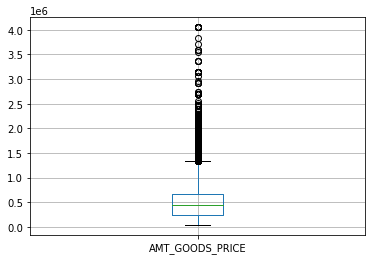

In [24]:
#checking for outliers in AMT_GOODS_PRICE
app_data.boxplot('AMT_GOODS_PRICE')

In [25]:
#removing the missing values from AMT_GOODS_PRICE
app_data = app_data[~np.isnan(app_data['AMT_GOODS_PRICE'])]

In [26]:
# Checking the AMT_REQ_CREDIT_BUREAU_QRT column
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265760.000000
mean          0.265525
std           0.794239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [27]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to 'category' and displaying frequency
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [28]:
# Imputation with 0 on AMT_REQ_CREDIT_BUREAU_QRT
app_data.loc[pd.isnull(app_data['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0


In [29]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
app_data = app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)
(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3     

In [30]:
# converting 'DAYS_BIRTH' to 'AGE'
app_data['AGE'] = abs(app_data['DAYS_BIRTH']//365)
app_data = app_data.drop(['DAYS_BIRTH'],axis=1)

In [31]:
# converting DAYS_EMPLOYED to YEARS_EMPLOYED
app_data['YEARS_EMPLOYED'] = abs(app_data['DAYS_EMPLOYED']//365)
app_data = app_data.drop(['DAYS_EMPLOYED'],axis=1)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0.0,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0.0,55,9


#### Handling Outliers

In [32]:
#removing the outliers

outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in outlier: 
    q1 = app_data[col].quantile(0.25)
    q3 = app_data[col].quantile(0.75)
    a = q3-q1
    range_low  = q1-1.5*a
    range_high = q3+1.5*a
    app_data = app_data.loc[(app_data[col] > range_low) & (app_data[col] < range_high)]

app_data.shape

(276203, 48)

In [33]:
# Delete all the FLAG_DOCUMENT columns
for i in range(2,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    app_data.drop(col,axis=1,inplace=True)

#### Binning AGE, AMT_INCOME_TOTAL, AMT_CREDIT and EXT_SOURCE_SCORE

In [34]:
app_data['AGE'].describe()


count    276203.000000
mean         44.430336
std          12.118087
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: AGE, dtype: float64

In [35]:
# Creating a column age_group
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'
    
app_data['AGE_GROUP'] = app_data['AGE'].apply(age_group)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,0,0,Business Entity Type 3,0.262949,0.139376,0.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,0,School,0.622246,0.510853,0.0,46,4,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,0,0,Government,0.555912,0.729567,0.0,53,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,0,0,Business Entity Type 3,0.650442,0.510853,0.0,53,9,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,0,0,Religion,0.322738,0.510853,0.0,55,9,Mid Age


In [36]:
round(app_data['AMT_CREDIT'].describe(),2)

count     276203.00
mean      530020.44
std       318135.26
min        45000.00
25%       269550.00
50%       472500.00
75%       753840.00
max      1558813.50
Name: AMT_CREDIT, dtype: float64

In [37]:
# Creating a column credit_group
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'
    
app_data['CREDIT_GROUP'] = app_data['AMT_CREDIT'].apply(credit_group)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.262949,0.139376,0.0,26,2,Young,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.622246,0.510853,0.0,46,4,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0.555912,0.729567,0.0,53,1,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,0.650442,0.510853,0.0,53,9,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,Religion,0.322738,0.510853,0.0,55,9,Mid Age,Medium


In [38]:

app_data['AMT_INCOME_TOTAL'].describe()

count    276203.000000
mean     149855.822498
std       61030.853784
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
# creating a column INCOME_GROUP
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

app_data['INCOME_GROUP'] = app_data['AMT_INCOME_TOTAL'].apply(income_group)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,0.262949,0.139376,0.0,26,2,Young,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,0.622246,0.510853,0.0,46,4,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0.555912,0.729567,0.0,53,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,0.650442,0.510853,0.0,53,9,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0.322738,0.510853,0.0,55,9,Mid Age,Medium,Medium


In [40]:
# creating a column EXT_SOURCE_SCORE
app_data['EXT_SOURCE_SCORE'] = round(((app_data['EXT_SOURCE_2'] + app_data['EXT_SOURCE_3'])/2),2)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.262949,0.139376,0.0,26,2,Young,Low,High,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.622246,0.510853,0.0,46,4,Mid Age,High,High,0.57
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.555912,0.729567,0.0,53,1,Mid Age,Low,Low,0.64
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,0.650442,0.510853,0.0,53,9,Mid Age,Low,Medium,0.58
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.322738,0.510853,0.0,55,9,Mid Age,Medium,Medium,0.42


In [41]:
# Dropping EXT_SOURCE_2 and EXT_SOURCE_3
app_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

# Creating EXT_SCORE_CATEGORY column
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'
    
app_data['EXT_SCORE_CATEGORY'] = app_data['EXT_SOURCE_SCORE'].apply(ext_source_group)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,0.0,26,2,Young,Low,High,0.20,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,0.0,46,4,Mid Age,High,High,0.57,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,0.0,53,9,Mid Age,Low,Medium,0.58,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0.0,55,9,Mid Age,Medium,Medium,0.42,Medium


In [42]:
# Remove rows with CODE_GENDER == XNA
app_data = app_data[~(app_data['CODE_GENDER'] == 'XNA')]

In [43]:
# Client with payment difficulties (Target=1)
df_current_target_1 = app_data[app_data['TARGET'] == 1]
df_current_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,0.0,26,2,Young,Low,High,0.20,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,Business Entity Type 3,2.0,52,8,Mid Age,High,Medium,0.37,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,Business Entity Type 3,0.0,48,4,Mid Age,High,High,0.31,Low
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,Self-employed,0.0,37,10,Young,Low,Medium,0.54,Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,XNA,0.0,68,1000,Senior,Low,Low,0.37,Low


In [44]:
# Client with all other cases (Target=0)
df_current_target_0 = app_data[app_data['TARGET'] == 0]
df_current_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,0.0,46,4,Mid Age,High,High,0.57,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,0.0,53,9,Mid Age,Low,Medium,0.58,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0.0,55,9,Mid Age,Medium,Medium,0.42,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,Other,1.0,47,5,Mid Age,Low,Low,0.49,Medium


#### Univariate Analysis
#### Defaulters and non-defaulters

[Text(0.5, 0, 'Gender')]

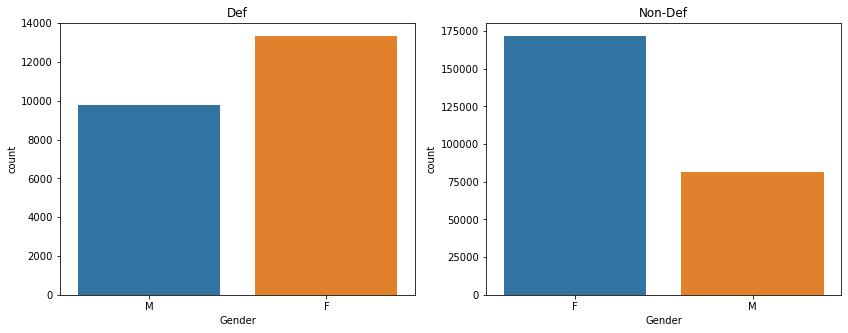

In [45]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_1)
plt.title('Def')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_0)
plt.title('Non-Def')
ax.set(xlabel='Gender')

#### Now, on the basis of Loan type

[Text(0.5, 0, 'Loan type')]

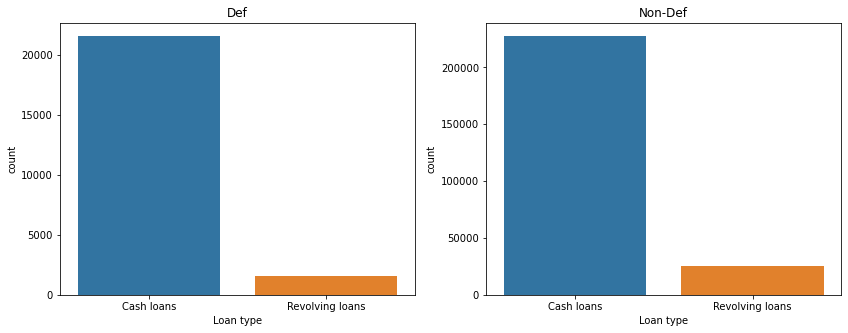

In [46]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_1)
plt.title('Def')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_0)
plt.title('Non-Def')
ax.set(xlabel='Loan type')

#### on basis of income type

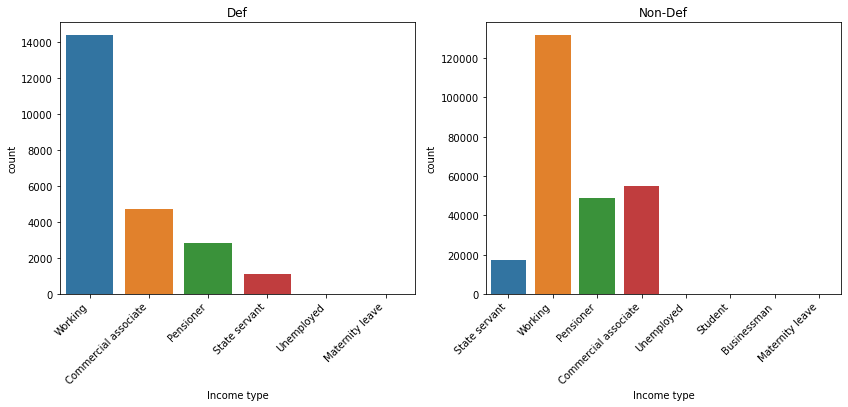

In [47]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Def')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Def')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### on basis of Education type

[Text(0.5, 0, 'Education type')]

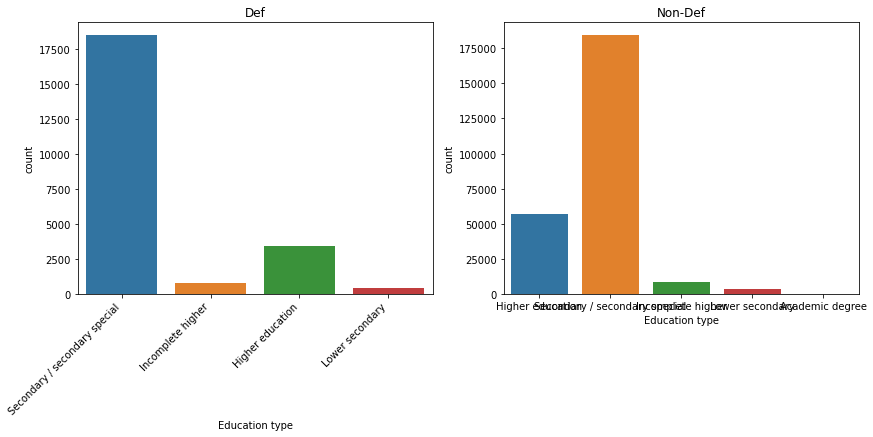

In [48]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_1)
plt.title('Def')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_0)
plt.title('Non-Def')
ax.set(xlabel='Education type')

#### on basis of familt status

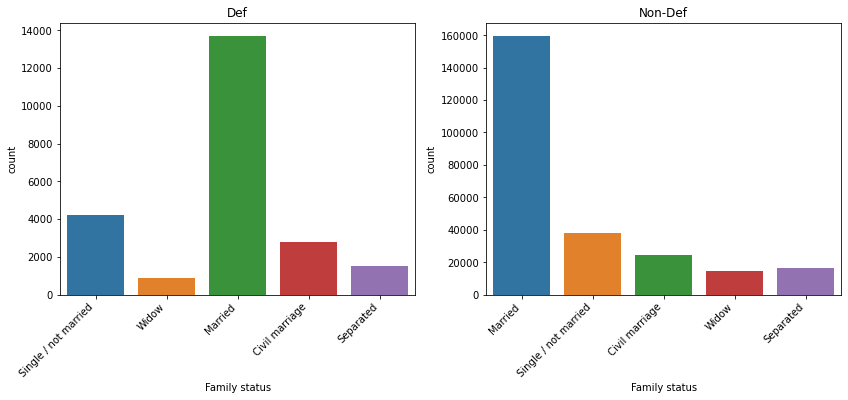

In [49]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_1)
plt.title('Def')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_0)
plt.title('Non-Def')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### on basis of credit amount

<AxesSubplot:title={'center':'Non Def'}, xlabel='AMT_CREDIT', ylabel='Density'>

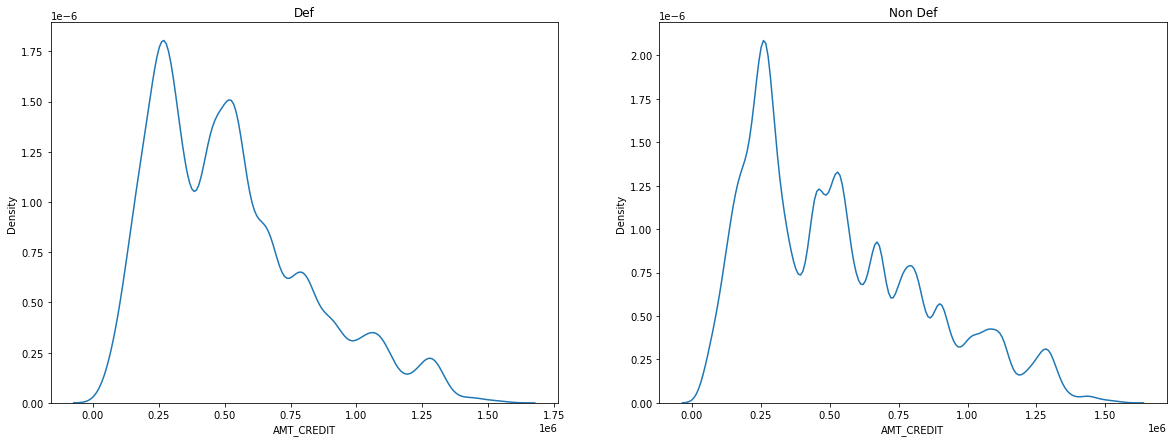

In [50]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1) 
plt.title('Def')
sns.distplot(df_current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Def')
sns.distplot(df_current_target_0['AMT_CREDIT'],hist=False)

#### on the basis of gender and total income

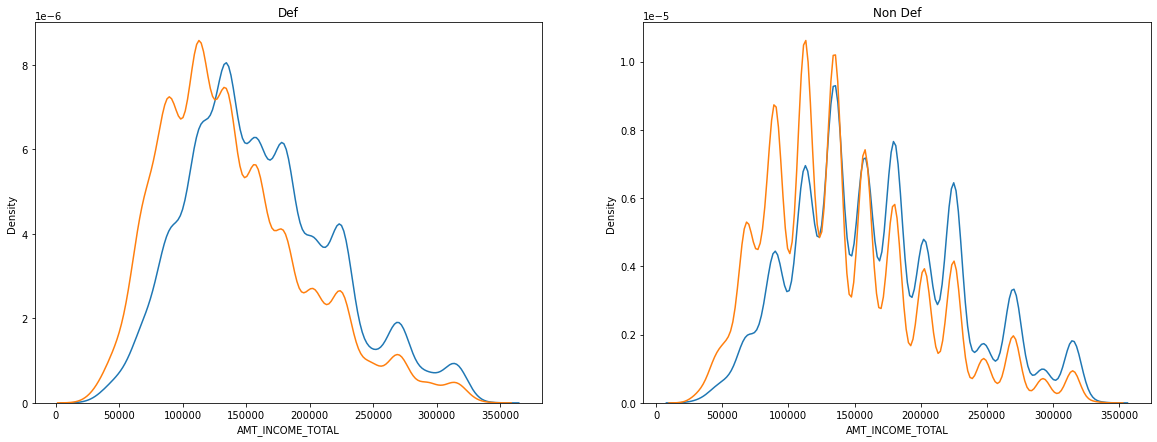

In [51]:
gender = ['M','F']
plt.figure(figsize=(20,7))
plt.subplot(1,2,1) 
plt.title('Def')
for i in gender:
    subset = df_current_target_1[df_current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Def')
for i in gender:
    subset = df_current_target_0[df_current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)

#### on the basis of Loan annuity

<AxesSubplot:title={'center':'Non Def'}, xlabel='AMT_ANNUITY', ylabel='Density'>

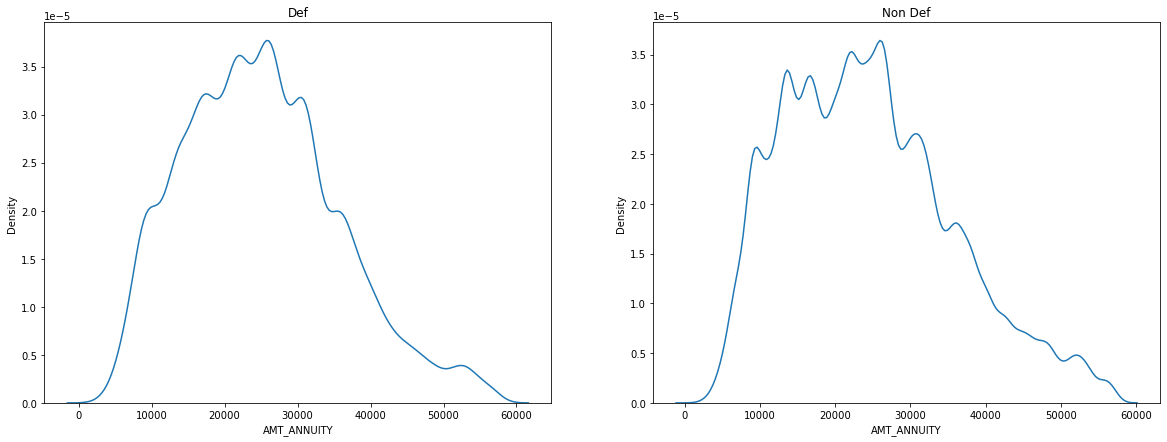

In [52]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1) 
plt.title('Def')
sns.distplot(df_current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Def')
sns.distplot(df_current_target_0['AMT_ANNUITY'],hist=False)

#### age group% - default and non default

In [53]:
# default
young_1 = round(100*len(app_data[(app_data['AGE_GROUP'] == 'Young') & (app_data['TARGET'] == 1)])/len(app_data[app_data['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(app_data[(app_data['AGE_GROUP'] == 'Mid Age') & (app_data['TARGET'] == 1)])/len(app_data[app_data['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(app_data[(app_data['AGE_GROUP'] == 'Senior') & (app_data['TARGET'] == 1)])/len(app_data[app_data['AGE_GROUP'] == 'Senior']),2)

agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

,AGE_GROUP,Percentage
0,Young,10.79
1,Mid Age,7.37
2,Senior,5.08


In [54]:
# non default
young_0 = round(100*len(app_data[(app_data['AGE_GROUP'] == 'Young') & (app_data['TARGET'] == 0)])/len(app_data[app_data['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(app_data[(app_data['AGE_GROUP'] == 'Mid Age') & (app_data['TARGET'] == 0)])/len(app_data[app_data['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(app_data[(app_data['AGE_GROUP'] == 'Senior') & (app_data['TARGET'] == 0)])/len(app_data[app_data['AGE_GROUP'] == 'Senior']),2)

agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

,AGE_GROUP,Percentage
0,Young,89.21
1,Mid Age,92.63
2,Senior,94.92


Text(0.5, 1.0, 'Non-Defaulters')

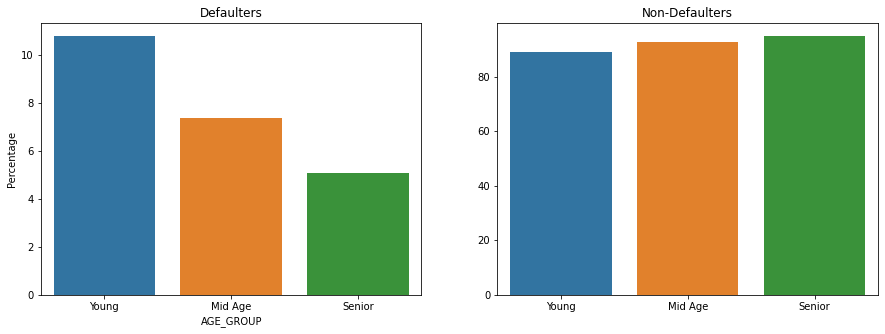

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters')

#### credit amount group 

Text(0.5, 1.0, 'Non-Defaulters')

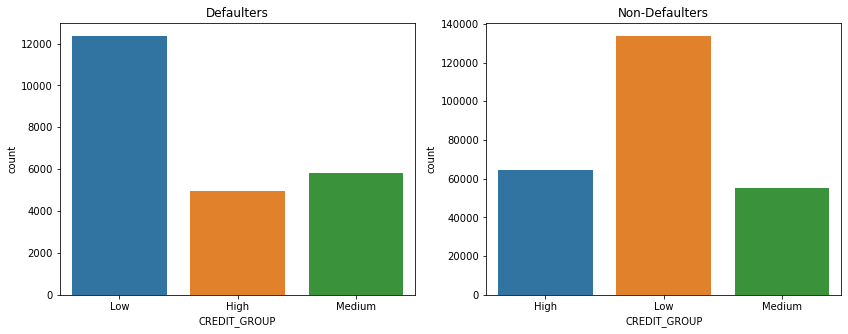

In [56]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

#### Income group

Text(0.5, 1.0, 'Non-Defaulters')

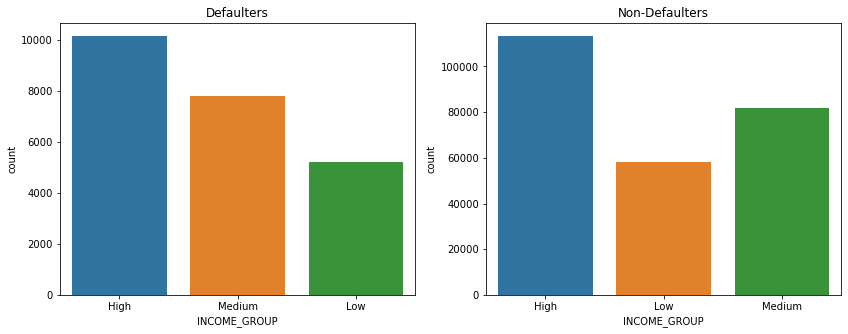

In [57]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

#### Bivariate analysis

#### Corelation matrix- defaulters 

<AxesSubplot:>

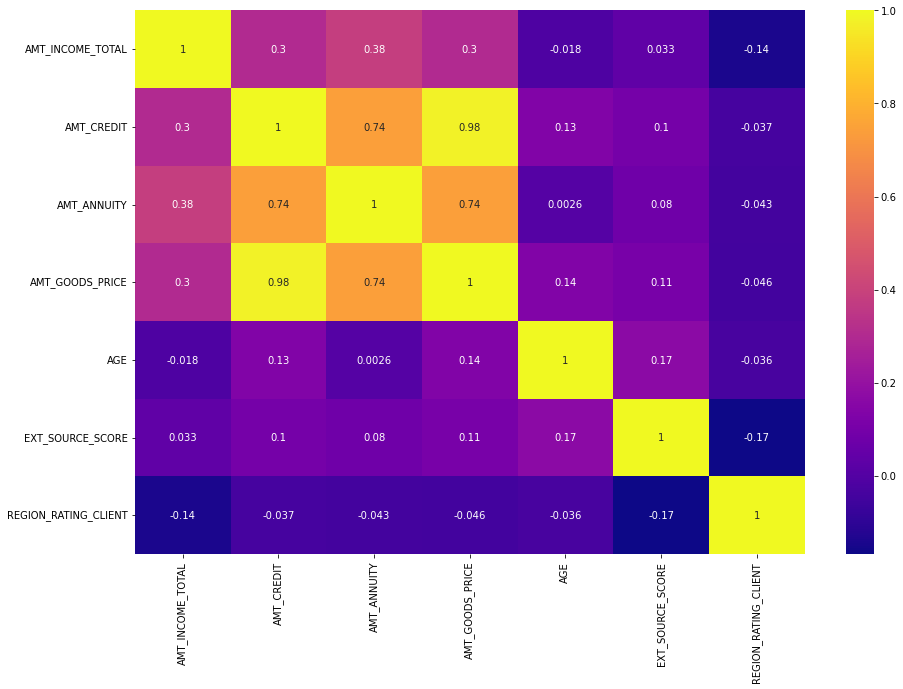

In [58]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']
corr_1 = df_current_target_1[cols]

plt.figure(figsize=(15,10))
sns.heatmap(corr_1.corr(),cmap="plasma",annot=True)

#### Corelation matrix- non defaulters  

<AxesSubplot:>

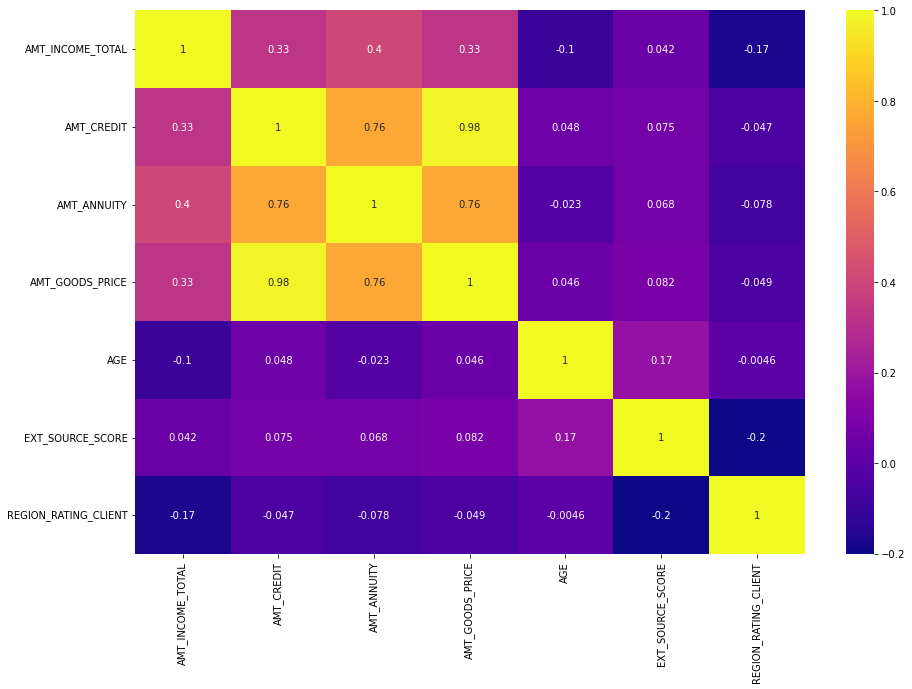

In [59]:
corr_2 = df_current_target_0[cols]
plt.figure(figsize=(15,10))
sns.heatmap(corr_2.corr(),cmap="plasma",annot=True)

#### Categorical variables

In [60]:
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

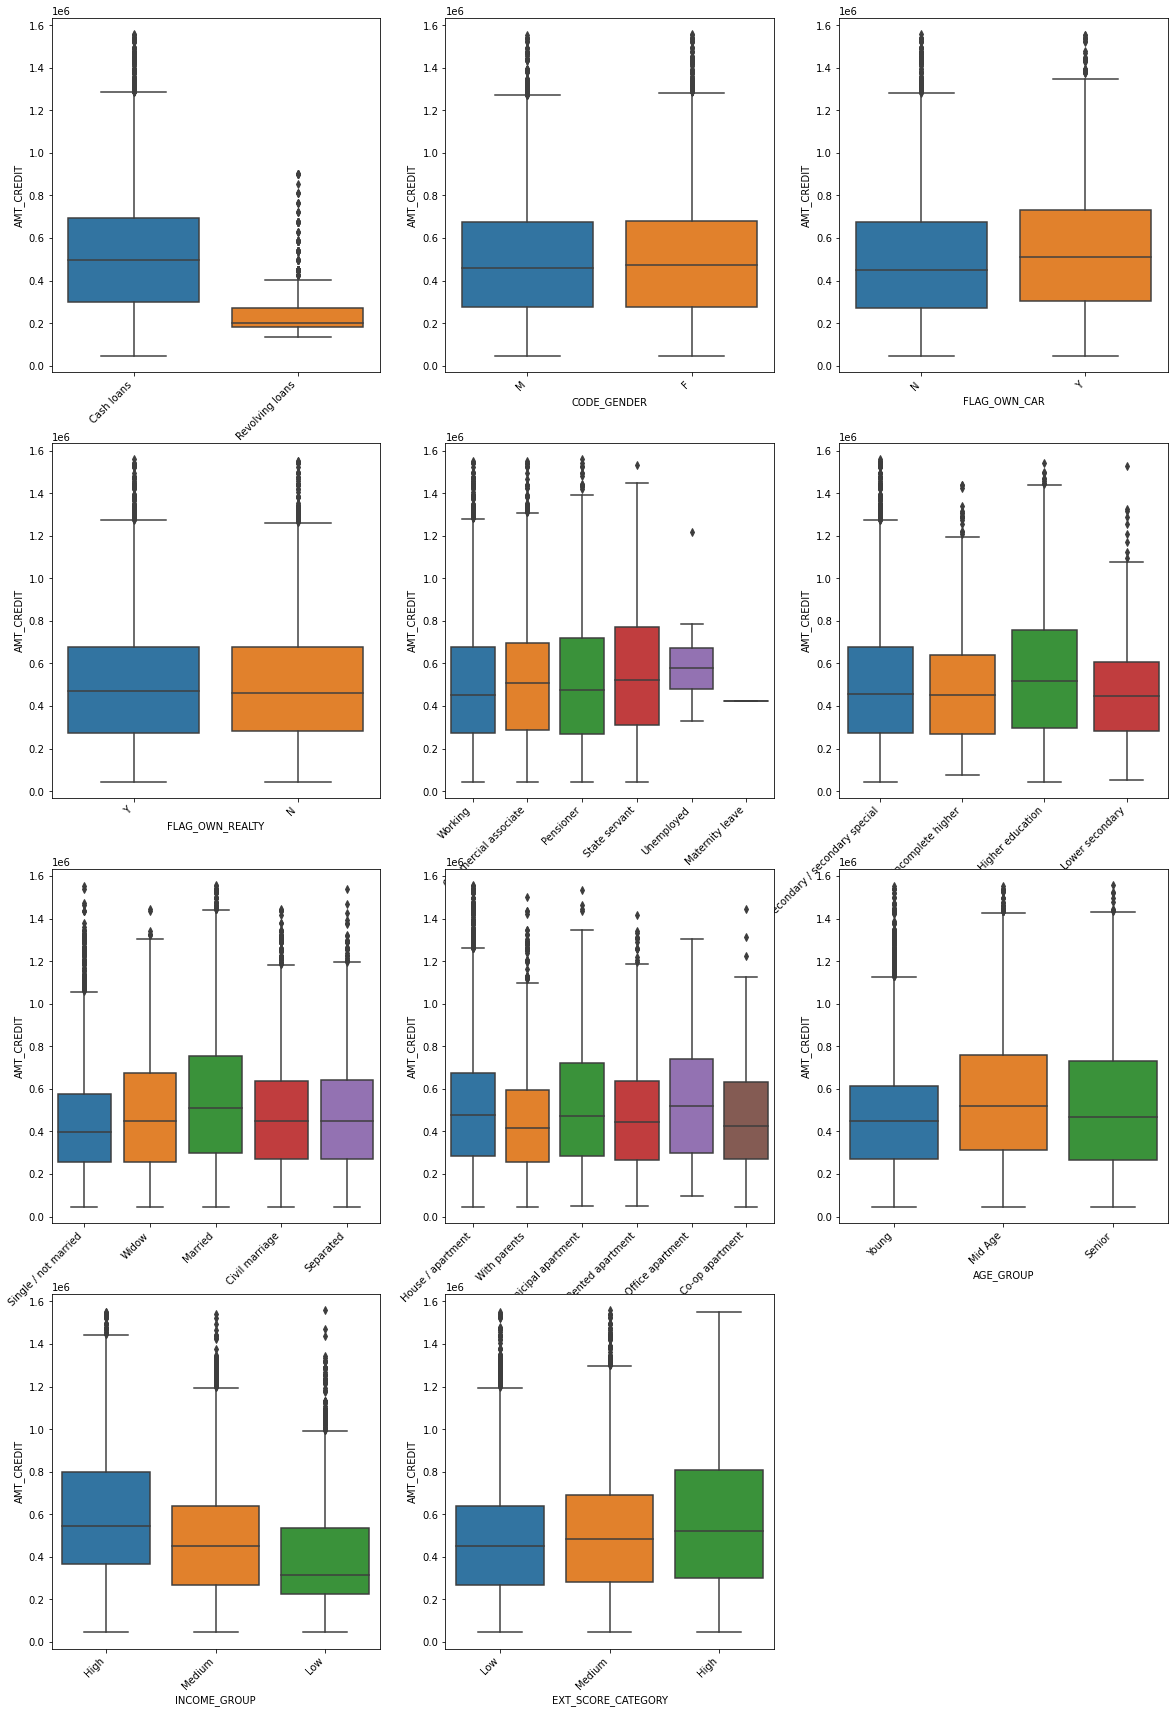

In [61]:
# Defaulters

plt.figure(figsize=(20,30))
i=0
for category in categories:
    i = i+1
    ax = plt.subplot(4,3,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

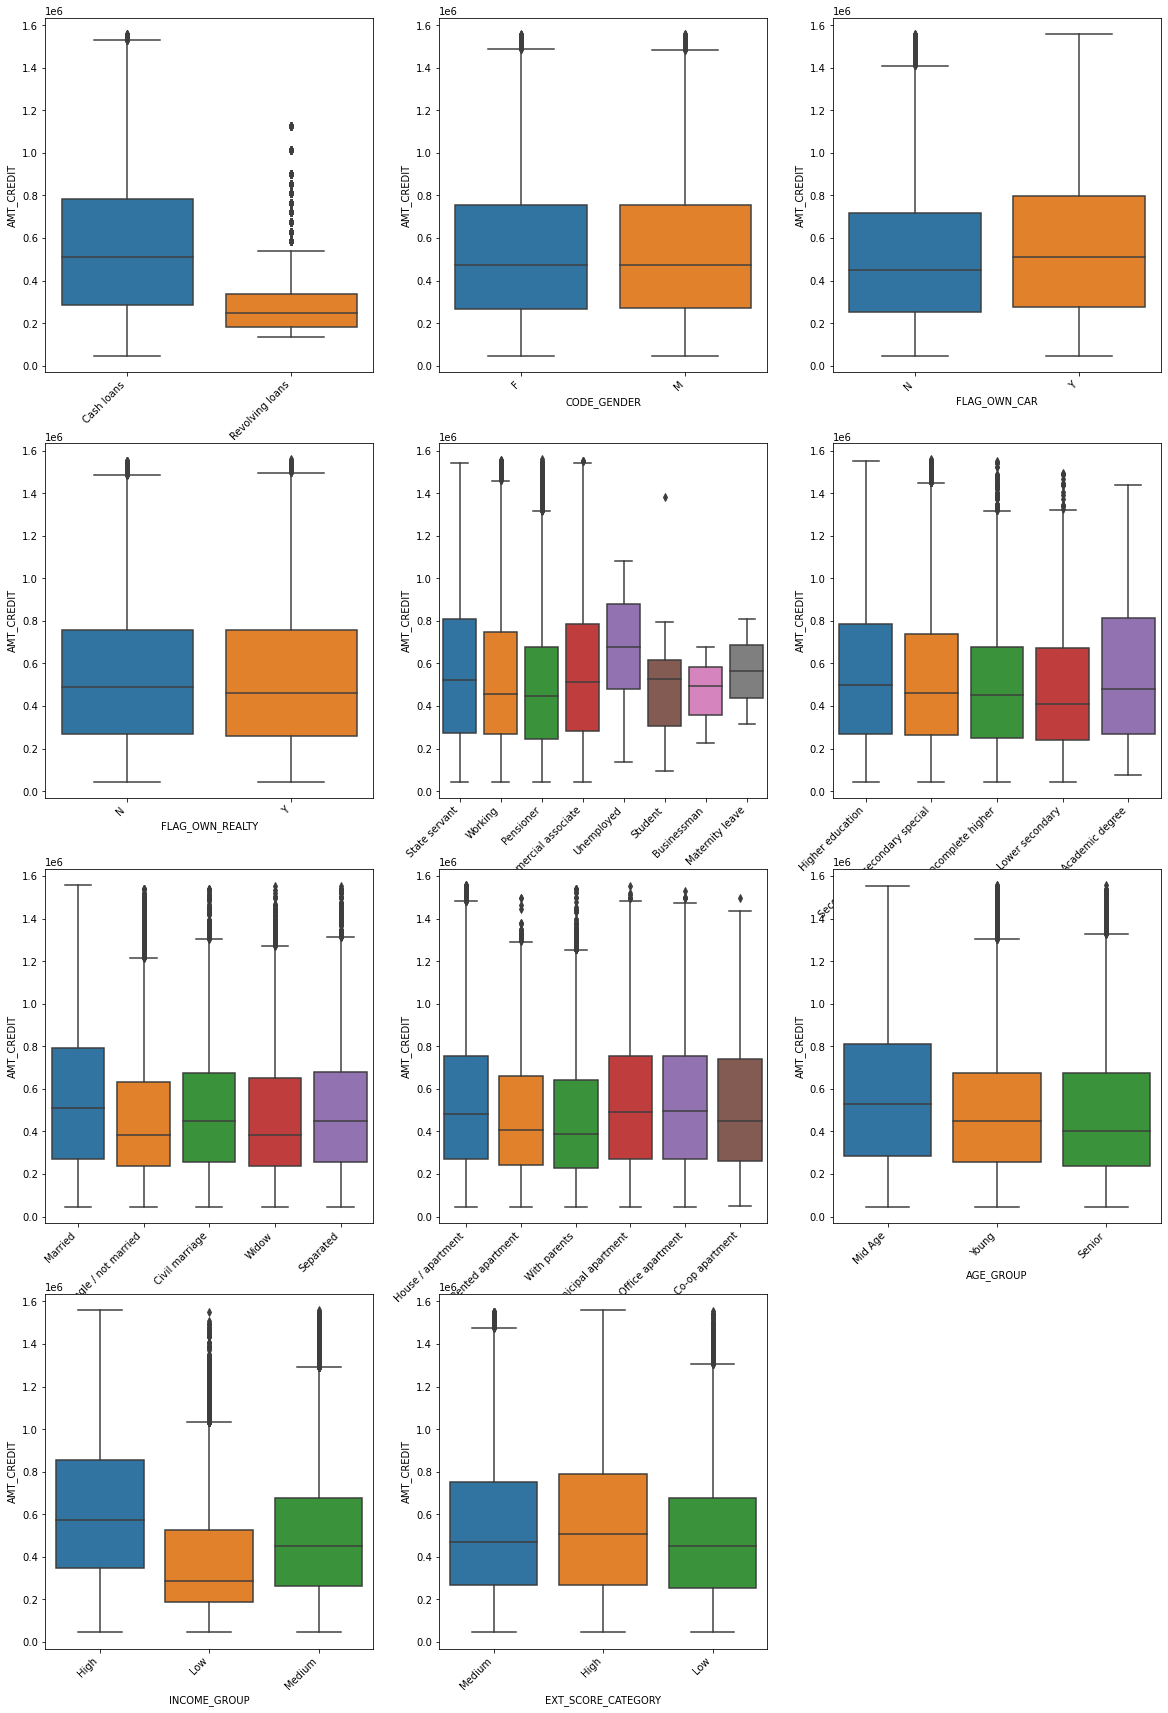

In [62]:
# non defaulters

plt.figure(figsize=(20,30))
i=0
for category in categories:
    i = i+1
    ax = plt.subplot(4,3,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### income group and gender

Text(0, 0.5, 'Defaulters')

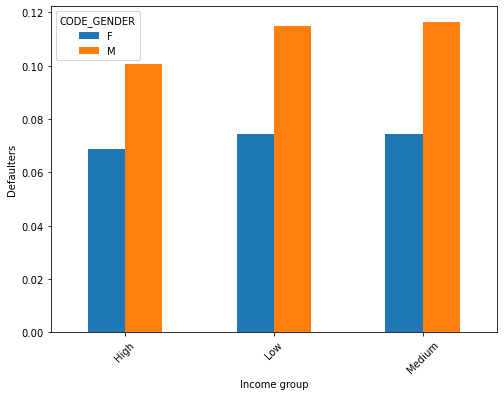

In [63]:
app_data.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

#### education and gender

Text(0, 0.5, 'Defaulters')

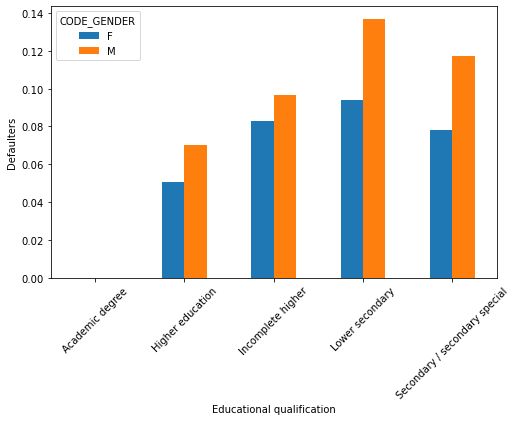

In [64]:
app_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

#### credit amount and income group

Text(0, 0.5, 'Defaulters')

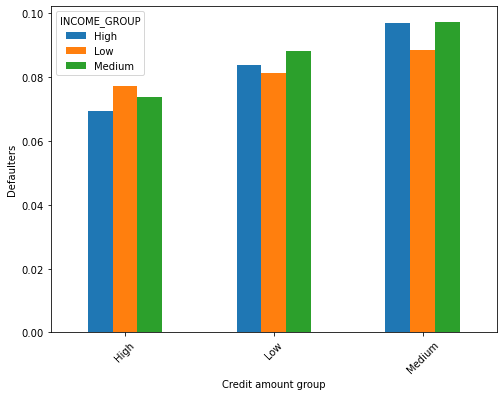

In [65]:
app_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

#### credit amount and age group

Text(0, 0.5, 'Defaulters')

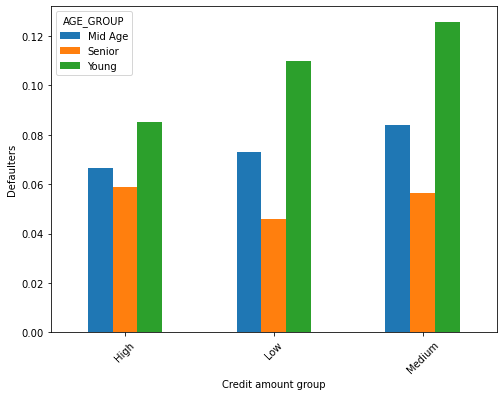

In [66]:
app_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

#### age group and income 

Text(0, 0.5, 'Defaulters')

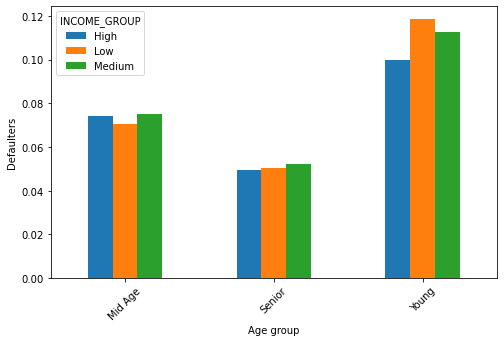

In [138]:
app_data.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

#### Profession and gender

Text(0, 0.5, 'Defaulters')

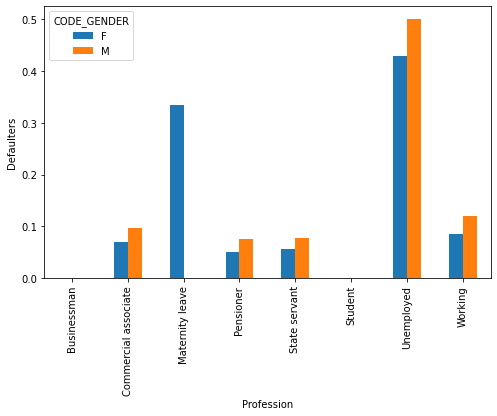

In [139]:
app_data.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

#### family status and age group

Text(0, 0.5, 'Defaulters')

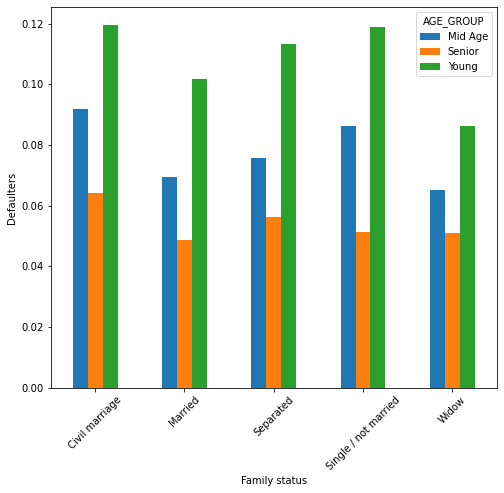

In [68]:
app_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

#### family status and gender

Text(0, 0.5, 'Defaulters')

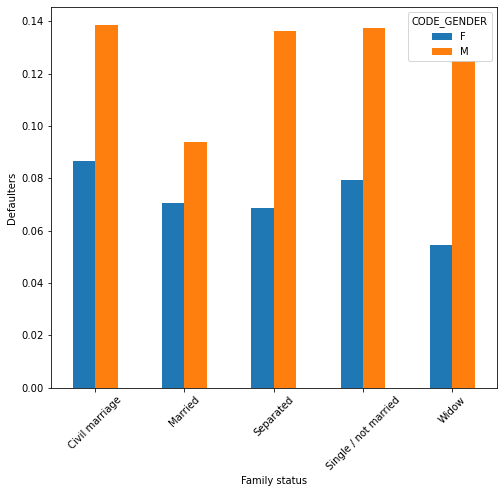

In [69]:
app_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

### pre_data

#### handling missing values

In [71]:
pre_data.replace('XNA',np.nan,inplace=True)
pre_data.replace('XAP',np.nan,inplace=True)

In [72]:
pre_data_null = (pre_data.isna().sum() / len(pre_data)) * 100
pre_data_null

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.020716
AMT_ANNUITY               22.286665
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000060
AMT_GOODS_PRICE           23.081773
NAME_CASH_LOAN_PURPOSE    95.830774
NAME_CONTRACT_STATUS       0.000000
DAYS_DECISION              0.000000
NAME_PAYMENT_TYPE         37.563091
CODE_REJECT_REASON        81.327123
NAME_CLIENT_TYPE           0.116213
NAME_GOODS_CATEGORY       56.927376
NAME_PORTFOLIO            22.286366
NAME_PRODUCT_TYPE         63.684414
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
NAME_SELLER_INDUSTRY      51.234153
CNT_PAYMENT               22.286366
NAME_YIELD_GROUP          30.966990
PRODUCT_COMBINATION        0.020716
dtype: float64

In [73]:
# dropping cloumns with null values greater than 30%
pre_data = pre_data.drop(columns= pre_data_null[pre_data_null > 30].index)
pre_data_null = (pre_data.isna().sum() / len(pre_data)) * 100
pre_data_null

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.020716
AMT_ANNUITY             22.286665
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_GOODS_PRICE         23.081773
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
NAME_CLIENT_TYPE         0.116213
NAME_PORTFOLIO          22.286366
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT             22.286366
PRODUCT_COMBINATION      0.020716
dtype: float64

In [74]:
# dropping columns
pre_data = pre_data[(~(np.isnan(pre_data['AMT_ANNUITY']) & np.isnan(pre_data['AMT_GOODS_PRICE']) & np.isnan(pre_data['CNT_PAYMENT'])))]
pre_data_null = (pre_data.isna().sum() / len(pre_data)) * 100
pre_data_null

SK_ID_PREV              0.000000
SK_ID_CURR              0.000000
NAME_CONTRACT_TYPE      0.000000
AMT_ANNUITY             2.871983
AMT_APPLICATION         0.000000
AMT_CREDIT              0.000075
AMT_GOODS_PRICE         3.865728
NAME_CONTRACT_STATUS    0.000000
DAYS_DECISION           0.000000
NAME_CLIENT_TYPE        0.070041
NAME_PORTFOLIO          2.871609
CHANNEL_TYPE            0.000000
SELLERPLACE_AREA        0.000000
CNT_PAYMENT             2.871609
PRODUCT_COMBINATION     0.000000
dtype: float64

In [76]:
# deleting AMT_ANNUITY
pre_data = pre_data[~(np.isnan(pre_data['AMT_ANNUITY']))]
pre_data_null = (pre_data.isna().sum() / len(pre_data)) * 100
pre_data_null

SK_ID_PREV              0.000000
SK_ID_CURR              0.000000
NAME_CONTRACT_TYPE      0.000000
AMT_ANNUITY             0.000000
AMT_APPLICATION         0.000000
AMT_CREDIT              0.000077
AMT_GOODS_PRICE         3.979957
NAME_CONTRACT_STATUS    0.000000
DAYS_DECISION           0.000000
NAME_CLIENT_TYPE        0.069416
NAME_PORTFOLIO          0.000000
CHANNEL_TYPE            0.000000
SELLERPLACE_AREA        0.000000
CNT_PAYMENT             0.000000
PRODUCT_COMBINATION     0.000000
dtype: float64

#### handling outliers

In [78]:
outlier1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in outlier1: 
    q1 = pre_data[col].quantile(0.25)
    q3 = pre_data[col].quantile(0.75)
    b = q3-q1
    range_low  = q1-1.5*b
    range_high = q3+1.5*b
    pre_data = pre_data.loc[(pre_data[col] > range_low) & (pre_data[col] < range_high)]


#### changing DAYS_DECISION to MONTHS_DECISION

In [79]:
pre_data['MONTH_DECISION'] = abs(pre_data['DAYS_DECISION']//30)
pre_data = pre_data.drop(['DAYS_DECISION'],axis=1)
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,Repeater,POS,Country-wide,35,12.0,POS mobile with interest,3
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: high,11
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,53779.5,Approved,New,POS,Country-wide,200,8.0,POS household without interest,14
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,26550.0,Approved,New,POS,Stone,83,3.0,POS household with interest,25
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,126490.5,Approved,New,POS,Regional / Local,130,6.0,POS other with interest,24


### Merging app_data nd pre_data

In [80]:
cols_app_data = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']
df_app_data_to_merge = app_data[cols_app_data]
df_app_data_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High,Low
1,100003,0,F,Higher education,Married,Mid Age,High,Medium
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low,High
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium,Medium
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium,Medium


In [81]:
cols_pre_data_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']
df_pre_data_to_merge = pre_data.drop(cols_pre_data_to_drop,axis=1)
df_pre_data_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,Approved,New,POS,Country-wide,8.0,14
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,Approved,New,POS,Stone,3.0,25
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,New,POS,Regional / Local,6.0,24


In [82]:
merged_data = pd.merge(df_pre_data_to_merge,df_app_data_to_merge, on='SK_ID_CURR', how='left')
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0.0,F,Incomplete higher,Married,Mid Age,High,High
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0.0,F,Secondary / secondary special,Married,Young,Low,Low
2,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,Approved,New,POS,Country-wide,8.0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,Approved,New,POS,Stone,3.0,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,New,POS,Regional / Local,6.0,24,0.0,M,Secondary / secondary special,Married,Young,High,Medium


In [84]:
len(merged_data[np.isnan(merged_data['TARGET'])])

162822

### removing records that are not needed

In [85]:
merged_data = merged_data[(~(np.isnan(merged_data['TARGET'])))] 

In [86]:
# Converting TARGET column from float64 to Int64
merged_data['TARGET'] = merged_data['TARGET'].astype('int64')

In [87]:
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0,F,Secondary / secondary special,Married,Young,Low,Low
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,New,POS,Regional / Local,6.0,24,0,M,Secondary / secondary special,Married,Young,High,Medium
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,Approved,Repeater,POS,Stone,8.0,50,0,M,Secondary / secondary special,Married,Mid Age,Medium,Medium
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Refused,Repeater,Cash,AP+ (Cash loan),18.0,20,0,M,Secondary / secondary special,Married,Senior,High,Low


In [88]:
merged_data['PERCENT_CREDIT'] = round(((merged_data['AMT_CREDIT']/merged_data['AMT_APPLICATION'])*100),2)
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0,F,Secondary / secondary special,Married,Young,Low,Low,121.28
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,New,POS,Regional / Local,6.0,24,0,M,Secondary / secondary special,Married,Young,High,Medium,94.75
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,Approved,Repeater,POS,Stone,8.0,50,0,M,Secondary / secondary special,Married,Mid Age,Medium,Medium,101.27
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Refused,Repeater,Cash,AP+ (Cash loan),18.0,20,0,M,Secondary / secondary special,Married,Senior,High,Low,109.90


### Univariate analysys

#### Loan status

[Text(0.5, 0, 'Loan status')]

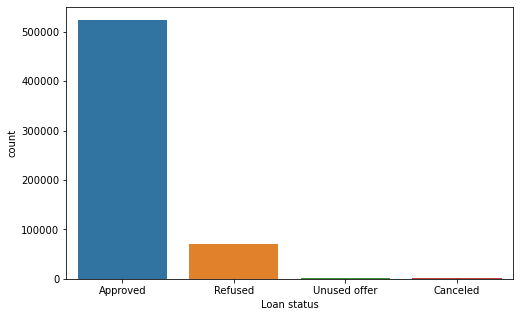

In [89]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=merged_data)
ax.set(xlabel='Loan status')

#### client type

[Text(0.5, 0, 'Client type')]

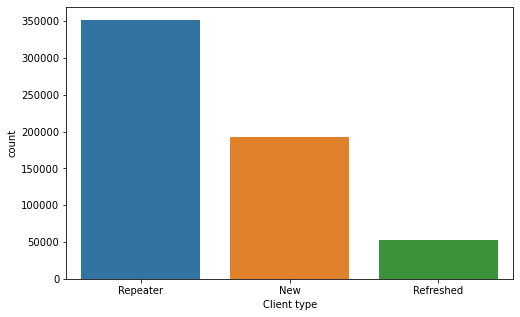

In [90]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=merged_data)
ax.set(xlabel='Client type')

#### portfolio

[Text(0.5, 0, 'Portfolio')]

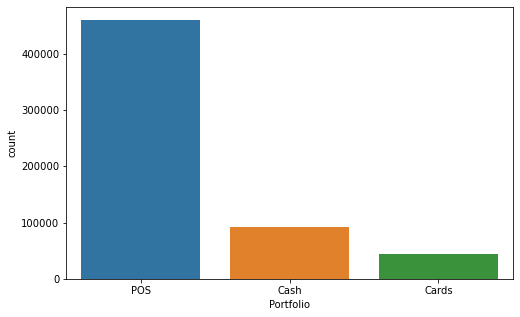

In [92]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=merged_data)
ax.set(xlabel='Portfolio')

#### Application channel type

[Text(0.5, 0, 'Application channel')]

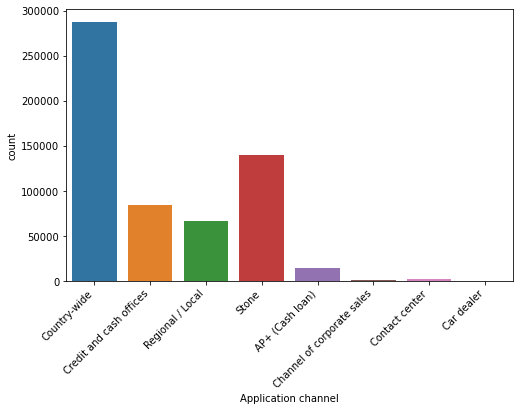

In [93]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=merged_data)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

#### Applied loan amount

[Text(0.5, 0, 'Application amount')]

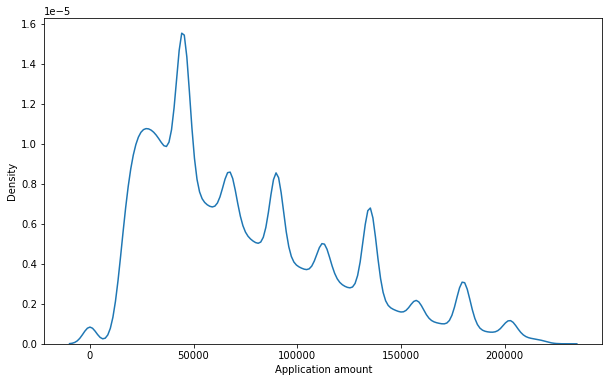

In [94]:
plt.figure(figsize=(10,6))
ax = sns.distplot(merged_data['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

#### Credited loan amount

[Text(0.5, 0, 'Credited amount')]

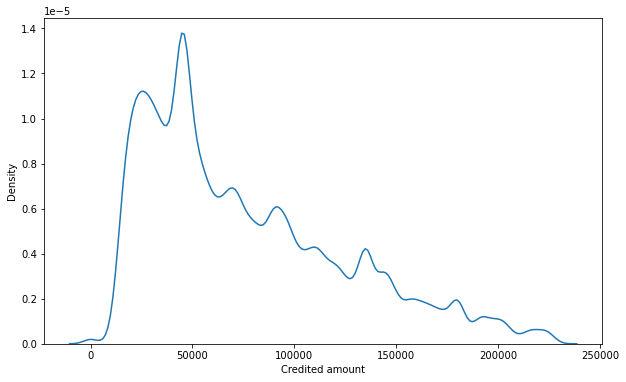

In [95]:
plt.figure(figsize=(10,6))
ax = sns.distplot(merged_data['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

#### previous vs current application

[Text(0.5, 0, 'Months')]

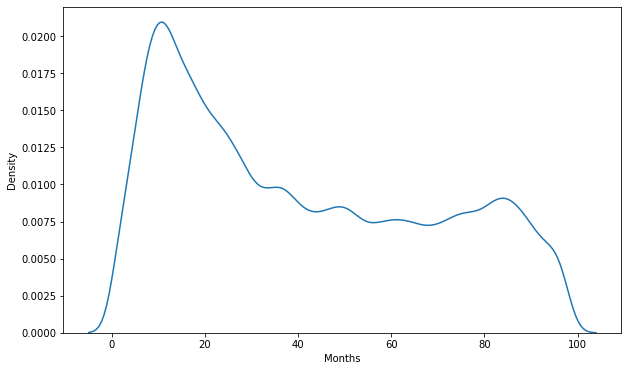

In [96]:
plt.figure(figsize=(10,6))
ax = sns.distplot(merged_data['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')

### Bivariate analysis

#### corelation matrix

In [97]:
cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']
merged_data_corr = merged_data[cols]
merged_data_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.0,17145.0,1730.430,100.00,12.0,3
1,112500.0,136444.5,15060.735,121.28,12.0,11
4,126490.5,119853.0,21307.455,94.75,6.0,24
5,26955.0,27297.0,4187.340,101.27,8.0,50
7,45000.0,49455.0,4666.500,109.90,18.0,20


In [98]:
merged_data_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
AMT_APPLICATION,1.000000,0.945785,0.791908,0.121942,0.292667,-0.214903
AMT_CREDIT,0.945785,1.000000,0.787556,0.317051,0.308993,-0.243613
AMT_ANNUITY,0.791908,0.787556,1.000000,0.174534,0.165864,-0.144606
PERCENT_CREDIT,0.121942,0.317051,0.174534,1.000000,0.289238,-0.244265
CNT_PAYMENT,0.292667,0.308993,0.165864,0.289238,1.000000,0.100386
MONTH_DECISION,-0.214903,-0.243613,-0.144606,-0.244265,0.100386,1.000000


<AxesSubplot:>

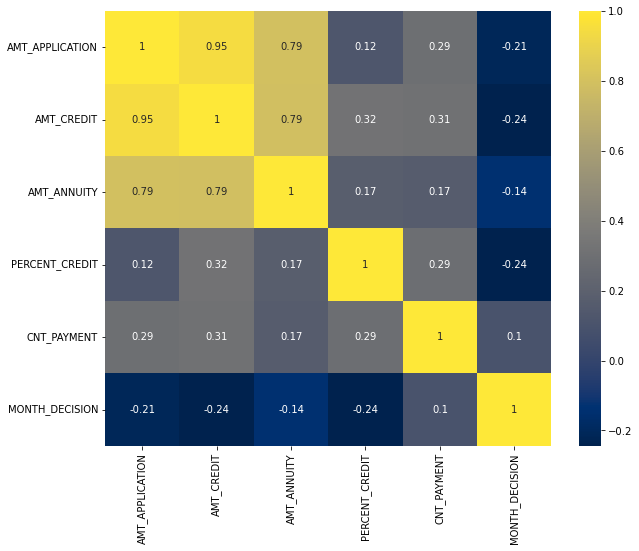

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(merged_data_corr.corr(),cmap="cividis",annot=True)

#### application amount vs credited amount

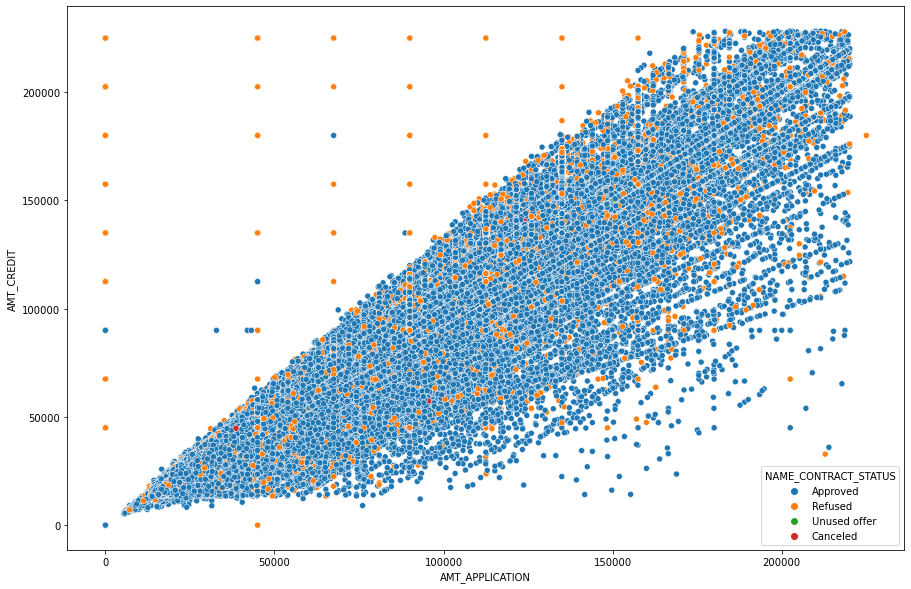

In [124]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,10))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=merged_data)


#### Application amount and the month taken to take decision related to current application

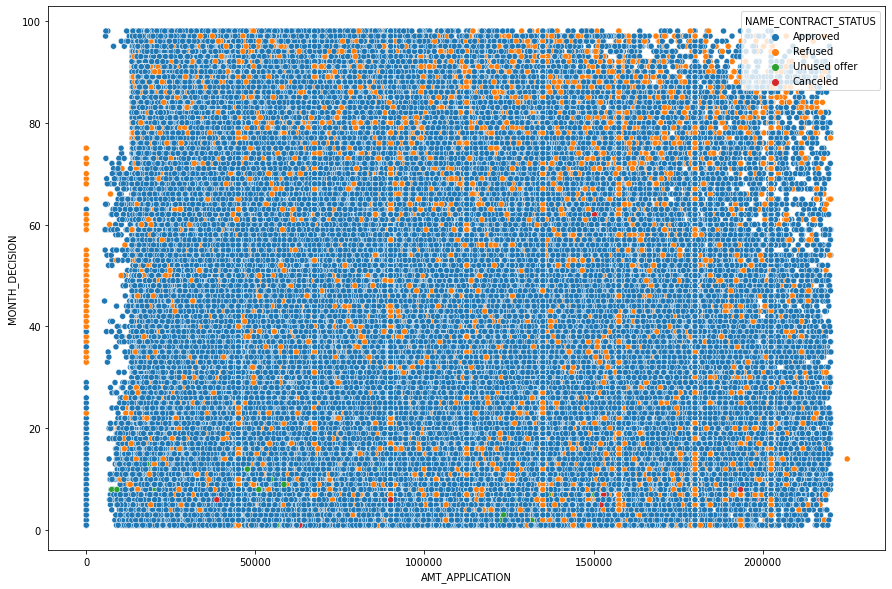

In [125]:

plt.figure(figsize=(15,10))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=merged_data)


#### Analysis on credit amount

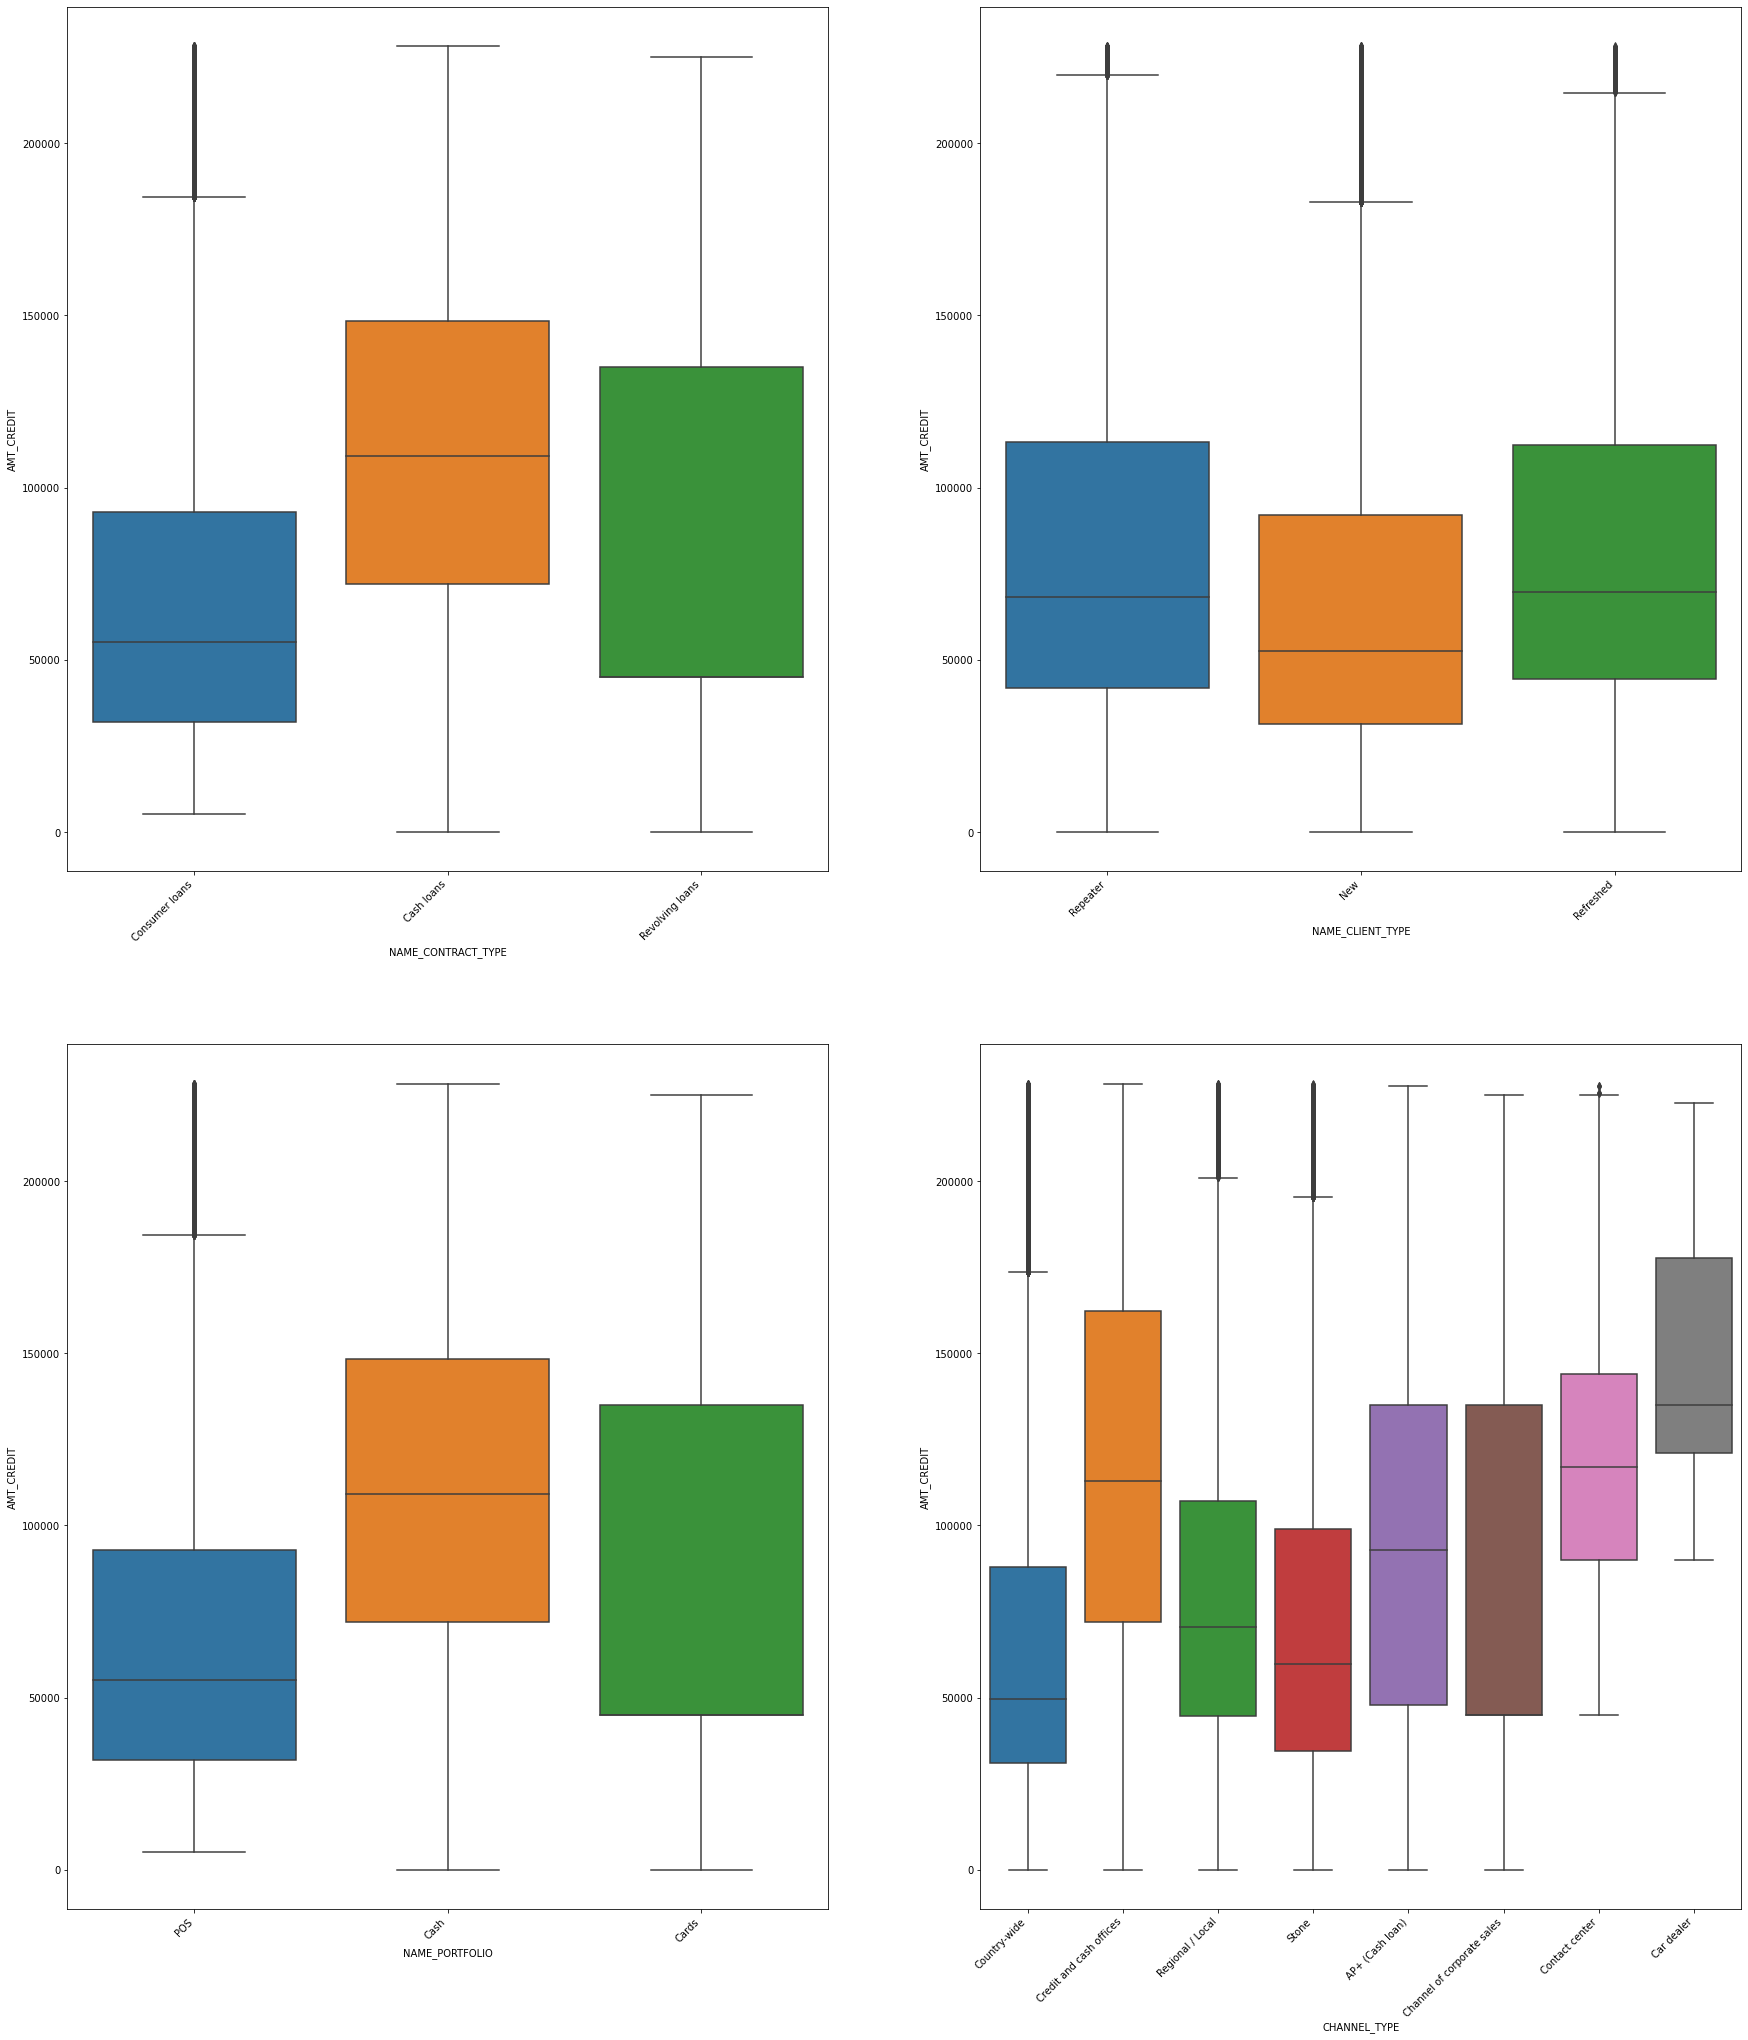

In [127]:
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

plt.figure(figsize=(30,35))
i=0
for category in categories:
    i = i+1
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged_data)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### status and client type

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

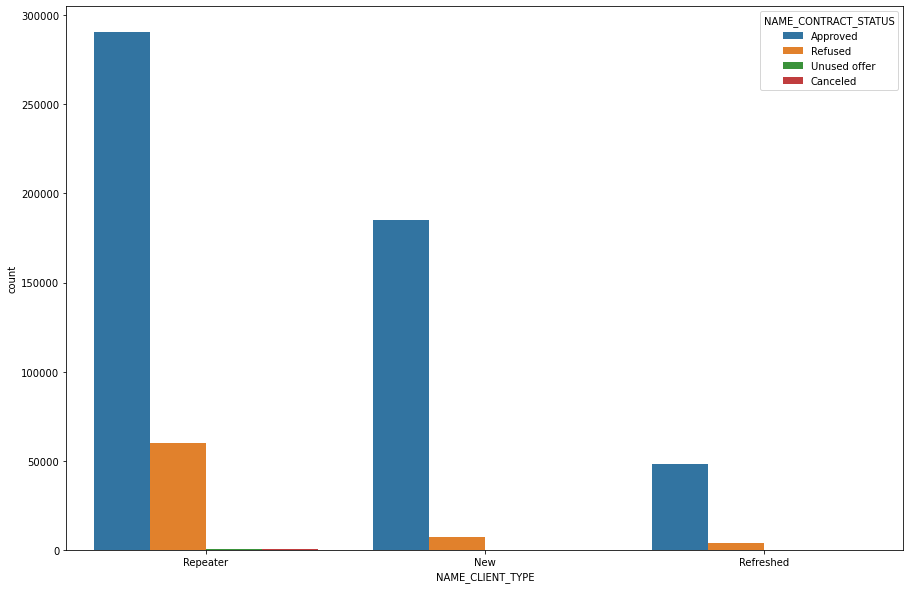

In [130]:
plt.figure(figsize=(15,10))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = merged_data )

#### Application status of current loan defaulter vs previous loan defaulter

Text(0, 0.5, 'Current defaulters')

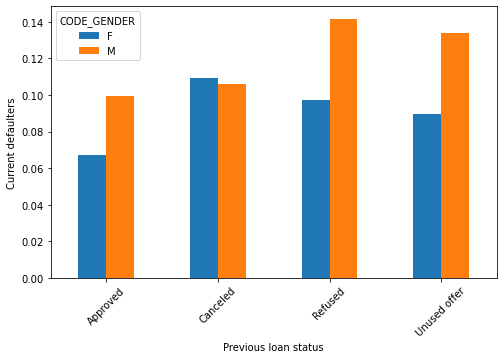

In [131]:
merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### along with clients

Text(0, 0.5, 'Current defaulters')

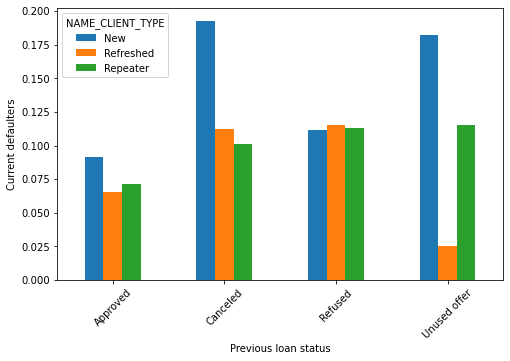

In [132]:
merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### with age group

Text(0, 0.5, 'Current defaulters')

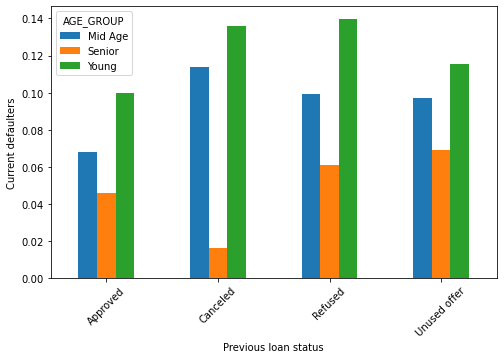

In [133]:
merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### income group

Text(0, 0.5, 'Current defaulters')

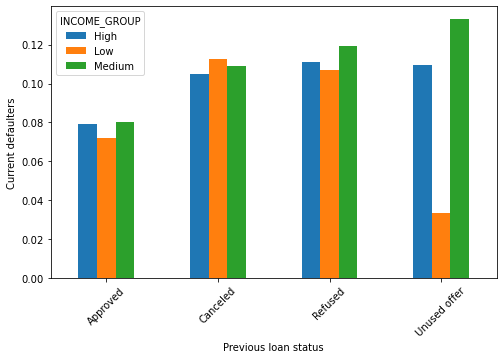

In [134]:
merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### with portfolio

Text(0, 0.5, 'Current defaulters')

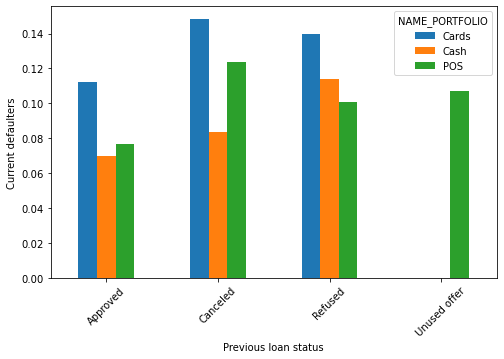

In [135]:
merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### with EXT_SCORE_CATEGORY

Text(0, 0.5, 'Current defaulters')

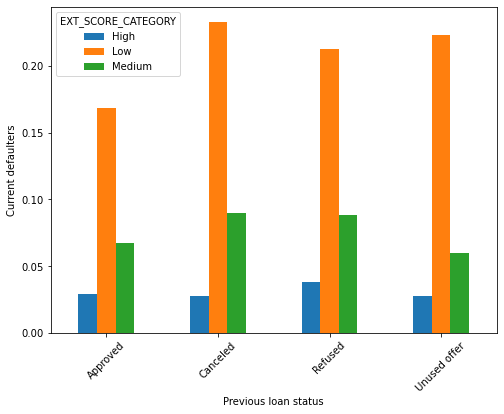

In [136]:
merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

### INSIGHTS:
1. Individuals with higher income levels exhibit lower default rates, while those in lower income brackets are comparatively more likely to default.

2. Both middle-aged and senior individuals across all income groups demonstrate lower default rates.

3. Senior individuals, regardless of family status, demonstrate a lower likelihood of defaulting on loans.

4. Young individuals, across all family statuses, exhibit a higher propensity for loan default.

5. Clients with a moderate amount of credit, irrespective of income groups, exhibit a higher default rate compared to those with low or high credit amounts.

6. Young clients who receive medium and low credit amounts are more prone to defaults.

7. Individuals with higher education levels demonstrate lower default rates, while those with lower secondary education are more likely to default.

8. Unemployed clients and those on maternity leave have a higher incidence of loan defaults.

9. New clients with previously unused offers exhibit higher default rates.

10. Young individuals who were previously refused loans show a higher likelihood of defaults.

11. Senior citizens, regardless of their previous loan status, exhibit lower default rates.

12. Across all income groups, applicants who were previously refused loans are more likely to default.

### RECOMMENDATIONS:
1. It is advisable to consider loan approvals with higher confidence for mid-aged and senior clients possessing higher incomes, as they show a lower likelihood of default.
2. Caution should be exercised when granting loans to young individuals in lower income groups, as they pose a higher risk of default.
3. It is advisable to consider loan approvals with greater confidence for senior citizens across various family statuses, as they show a consistent lower risk of default.
4. Caution is advised when granting loans to young, single, separated, and civil-marriage individuals, as they present a higher risk of default.
5. Consider granting a slightly higher amount of loans to clients across all income groups, as this may contribute to lower default rates.
6. It is strongly advised to exercise caution when providing medium and low amounts of loans to young clients due to the observed higher risk of defaults.
7. It is generally safe to consider granting loans to clients with higher education across various professions, except in the case of unemployed individuals and women on maternity leave. Caution should be exercised in those specific scenarios.
8. There is a risk associated with approving loans for clients whose applications were previously refused or whose offers were left unused. Caution should be exercised in such cases to minimize the likelihood of defaults.
9. It is generally safer to approve loans for senior citizens due to their lower default rates.
10. Granting loans to applicants who have been previously approved poses a lower risk across all income groups. Caution should be exercised in the case of applicants with a history of loan refusals, as they have shown a higher likelihood of defaults.


